# Chapter 3, example 1

In [1]:
import tensorflow as tf
import numpy as np
import pylab as plt
from mpl_toolkits.mplot3d import Axes3D

import os
if not os.path.isdir('figures'):
    os.makedirs('figures')

In [2]:
no_iters = 30
lr = 0.4

SEED = 10
np.random.seed(SEED)

In [3]:
# training data
x_train = np.array([[1.0, 2.5], [2.0, -1.0], [1.5, 3.0],
	[0.0, -1.5], [-3.5, 1.0], [2.5, 0.0], [0.5, 1.5], [0.0, -2.0]])
y_train = np.array([1, 0, 1, 0, 1, 0, 0, 0])

print(x_train)
print(y_train)
print(lr)

[[ 1.   2.5]
 [ 2.  -1. ]
 [ 1.5  3. ]
 [ 0.  -1.5]
 [-3.5  1. ]
 [ 2.5  0. ]
 [ 0.5  1.5]
 [ 0.  -2. ]]
[1 0 1 0 1 0 0 0]
0.4


In [4]:
# class for a linear neuron
class DiscretePerceptron(object):
  def __init__(self):
    self.w = tf.Variable(np.random.rand(2), dtype=tf.float64)
    self.b = tf.Variable(0., dtype=tf.float64)

  def __call__(self, x):
    u = tf.tensordot(x ,self.w, axes=1) + self.b
    y = tf.where(tf.greater(u, 0), 1, 0)
    return u, y

In [5]:
# funtion executing a training step
def train_step(model, inputs, outputs, learning_rate):
    _, predicted_outputs = model(inputs)
    delta = tf.cast(outputs - predicted_outputs, tf.float64)
    model.w.assign(model.w + learning_rate * delta * inputs)
    model.b.assign(model.b + learning_rate * delta)

In [6]:
model = DiscretePerceptron()

err = []
idx = np.arange(len(x_train))
for i in range(no_iters):
    np.random.shuffle(idx)
    x_train, y_train = x_train[idx], y_train[idx]
    
    err_ = 0
    for p in np.arange(len(x_train)):
        
        u, y = model(x_train[p])
        train_step(model, x_train[p], y_train[p], lr)
        
        err_ += (y.numpy() != y_train[p])

        if (i == 0):
            print('p: {}'.format(p+1))
            print('x: {}'.format(x_train[p]))
            print('d: {}'.format(y_train[p]))
            print('u: {}'.format(u))
            print('y: {}'.format(y))
            print('w: {}, b: {}'.format(model.w.numpy(), model.b.numpy()))

    err.append(err_)
       
    print('iter: {}, error: {}'.format(i+1, err[i]))
        

p: 1
x: [1.5 3. ]
d: 1
u: 1.2192368129783235
y: 1
w: [0.77132064 0.02075195], b: 0.0
p: 2
x: [ 0. -2.]
d: 0
u: -0.041503898718803
y: 0
w: [0.77132064 0.02075195], b: 0.0
p: 3
x: [2.5 0. ]
d: 0
u: 1.928301608166865
y: 1
w: [-0.22867936  0.02075195], b: -0.4
p: 4
x: [0.5 1.5]
d: 0
u: -0.4832117543275248
y: 0
w: [-0.22867936  0.02075195], b: -0.4
p: 5
x: [-3.5  1. ]
d: 1
u: 0.42112969792579047
y: 1
w: [-0.22867936  0.02075195], b: -0.4
p: 6
x: [ 0.  -1.5]
d: 0
u: -0.4311279240391023
y: 0
w: [-0.22867936  0.02075195], b: -0.4
p: 7
x: [ 2. -1.]
d: 0
u: -0.8781106628259095
y: 0
w: [-0.22867936  0.02075195], b: -0.4
p: 8
x: [1.  2.5]
d: 1
u: -0.5767994833347503
y: 0
w: [0.17132064 1.02075195], b: 0.0
iter: 1, error: 2
iter: 2, error: 2
iter: 3, error: 2
iter: 4, error: 2
iter: 5, error: 1
iter: 6, error: 2
iter: 7, error: 1
iter: 8, error: 0
iter: 9, error: 0
iter: 10, error: 0
iter: 11, error: 0
iter: 12, error: 0
iter: 13, error: 0
iter: 14, error: 0
iter: 15, error: 0
iter: 16, error: 0
it

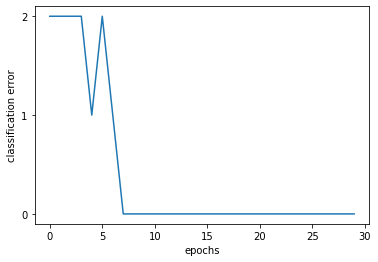

In [7]:
# plot the learning curves
plt.figure(2)
plt.plot(range(no_iters), err)
plt.xlabel('epochs')
plt.ylabel('classification error')
plt.yticks([0, 1, 2])
plt.savefig('./figures/3.1_2.png')

In [8]:
print('w: {}, b: {}'.format(model.w.numpy(), model.b.numpy()))

# find predicctions
pred = []
for p in np.arange(len(x_train)):
    _, y = model(x_train[p])
    pred.append(y.numpy())
print(y_train, pred)

w: [-0.42867936  0.82075195], b: -1.6
[1 1 0 1 0 0 0 0] [1, 1, 0, 1, 0, 0, 0, 0]


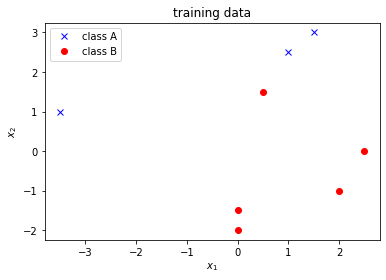

In [9]:
# plot the training data
plt.figure(1)
plt.plot(x_train[y_train==1,0], x_train[y_train==1,1],'bx', label ='class A')
plt.plot(x_train[y_train==0,0],x_train[y_train==0,1],'ro', label='class B')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('training data')
plt.legend()
plt.savefig('./figures/3.1_1.png')

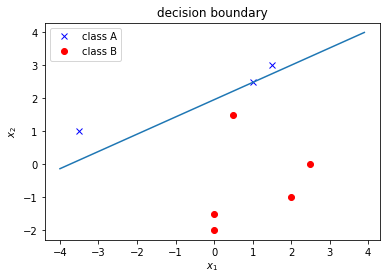

In [10]:
# plot the decision boundary
x1 = np.arange(-4, 4, 0.1)
x2 = -(x1*model.w[0] + model.b)/model.w[1]

plt.figure(3)
plt.plot(x_train[y_train==1,0], x_train[y_train==1,1],'bx', label ='class A')
plt.plot(x_train[y_train==0,0],x_train[y_train==0,1],'ro', label='class B')
plt.plot(x1, x2, '-')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('decision boundary')
plt.legend()
plt.savefig('./figures/3.1_3.png')